In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat
import re


In [2]:
df = pd.read_csv("D:/python_projects/ML_Projects/02_Logistic Regression/Credit Card Approval Prediction/application_record.csv")
# df.head()

In [3]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [4]:
df.OCCUPATION_TYPE.shape

(438557,)

In [5]:
summary = df.columns
for i in range(len(summary)):
    smry = df[summary[i]].unique()
    print(f"unique list of {summary[i]} :{smry}")

unique list of ID :[5008804 5008805 5008806 ... 6841878 6842765 6842885]
unique list of CODE_GENDER :['M' 'F']
unique list of FLAG_OWN_CAR :['Y' 'N']
unique list of FLAG_OWN_REALTY :['Y' 'N']
unique list of CNT_CHILDREN :[ 0  1  3  2  4  5 14 19  7  9 12  6]
unique list of AMT_INCOME_TOTAL :[ 427500.    112500.    270000.    283500.    135000.    130500.
  157500.    405000.    211500.    360000.    126000.    315000.
  247500.    297000.    225000.    166500.    216000.    255150.
  148500.    202500.     94500.    450000.    180000.     90000.
  765000.    382500.    144000.    229500.    292500.     74250.
   40500.    337500.    193500.    267750.    139500.     67500.
  252000.    900000.    115290.    279000.     76500.    234000.
   81000.    108000.     99000.    198000.     45000.    238500.
  117000.    153000.   1350000.    445500.    495000.     85500.
  306000.    562500.    189000.    328500.    310500.    540000.
  171000.    675000.    121500.     72000.     65250.    1

unique list of NAME_FAMILY_STATUS :['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
unique list of NAME_HOUSING_TYPE :['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
unique list of DAYS_BIRTH :[-12005 -21474 -19110 ...  -8169  -9738 -22257]
unique list of DAYS_EMPLOYED :[-4542 -1134 -3051 ... -8300 -9020 -4884]
unique list of FLAG_MOBIL :[1]
unique list of FLAG_WORK_PHONE :[1 0]
unique list of FLAG_PHONE :[0 1]
unique list of FLAG_EMAIL :[0 1]
unique list of OCCUPATION_TYPE :[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
unique list of CNT_FAM_MEMBERS :[ 2.  1.  5.  3.  4.  6. 15.  7. 20.  9. 11. 14.  8.]


In [6]:
#pd.get_dummies(df.OCCUPATION_TYPE)

In [7]:
summary = df.columns
summary

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [8]:
target_mean = np.mean(df.AMT_INCOME_TOTAL)
target_mean 

187524.28600950394

In [9]:
target_mean = round(target_mean, 1)

In [10]:
df['TARGET'] = (df['AMT_INCOME_TOTAL']> target_mean ).map({True : 1, False : 0})

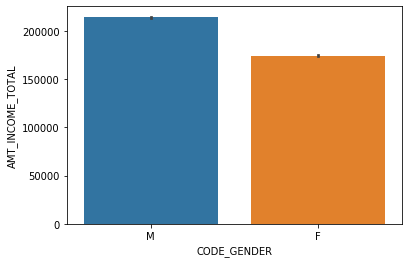

In [11]:
sns.barplot(df, x = 'CODE_GENDER',  y = 'AMT_INCOME_TOTAL')

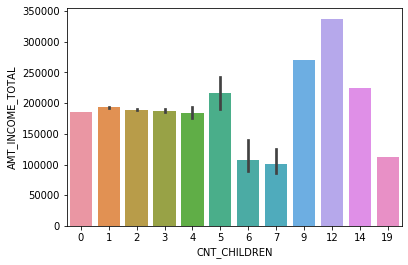

In [12]:
sns.barplot(df, x= 'CNT_CHILDREN', y = 'AMT_INCOME_TOTAL')

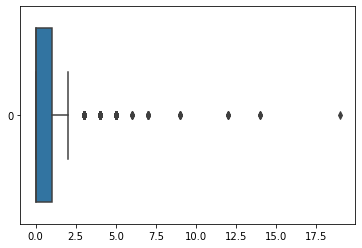

In [13]:
sns.boxplot(df.CNT_CHILDREN, orient='h')

In [11]:
#Outliers heandeling
for i in range(len(df.CNT_CHILDREN)):
    if df.CNT_CHILDREN[i] > 2:
        df.CNT_CHILDREN[i] = 2
    else:
        continue

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


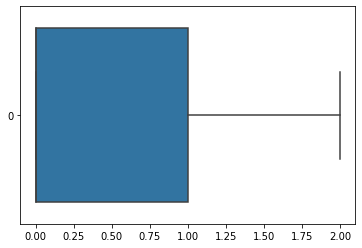

In [15]:
sns.boxplot(df.CNT_CHILDREN, orient='h')

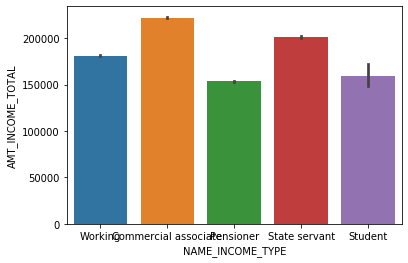

In [16]:
sns.barplot(df, x= df.NAME_INCOME_TYPE, y = 'AMT_INCOME_TOTAL')

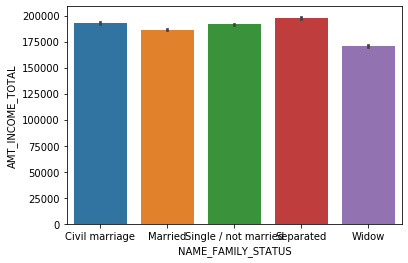

In [17]:
sns.barplot(df, x= df.NAME_FAMILY_STATUS, y = 'AMT_INCOME_TOTAL')

In [18]:
df.AMT_INCOME_TOTAL.describe()

count    4.385570e+05
mean     1.875243e+05
std      1.100869e+05
min      2.610000e+04
25%      1.215000e+05
50%      1.607805e+05
75%      2.250000e+05
max      6.750000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [19]:
225000 + (1.5*(225000 - 121500))

380250.0

In [12]:
income_mean = np.mean(df.AMT_INCOME_TOTAL)
income_mean

187524.28600950394

In [13]:
#Outliers heandeling
for i in range(len(df.AMT_INCOME_TOTAL)):
    if df.AMT_INCOME_TOTAL[i] > 378900:
        df.AMT_INCOME_TOTAL[i] = 187524
    else:
        continue

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


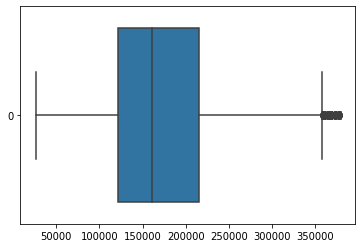

In [22]:
sns.boxplot(df.AMT_INCOME_TOTAL, orient='h')

In [14]:
df = df[['CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS','FLAG_WORK_PHONE', 'FLAG_PHONE','TARGET']]
df.head()

,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,FLAG_WORK_PHONE,FLAG_PHONE,TARGET
0,M,Y,0,Working,Civil marriage,1,0,1
1,M,Y,0,Working,Civil marriage,1,0,1
2,M,Y,0,Working,Married,0,0,0
3,F,N,0,Commercial associate,Single / not married,0,1,1
4,F,N,0,Commercial associate,Single / not married,0,1,1


In [15]:
df['CODE_GENDER'] = df['CODE_GENDER'].map({"M":1, "F":0})
df.head()

,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,FLAG_WORK_PHONE,FLAG_PHONE,TARGET
0,1,Y,0,Working,Civil marriage,1,0,1
1,1,Y,0,Working,Civil marriage,1,0,1
2,1,Y,0,Working,Married,0,0,0
3,0,N,0,Commercial associate,Single / not married,0,1,1
4,0,N,0,Commercial associate,Single / not married,0,1,1


In [16]:
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({"Y":1, "N":0})
df.head()

,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,FLAG_WORK_PHONE,FLAG_PHONE,TARGET
0,1,1,0,Working,Civil marriage,1,0,1
1,1,1,0,Working,Civil marriage,1,0,1
2,1,1,0,Working,Married,0,0,0
3,0,0,0,Commercial associate,Single / not married,0,1,1
4,0,0,0,Commercial associate,Single / not married,0,1,1


In [17]:
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].map({"Working":1, "Commercial associate":2, "Pensioner":3, "State servant":4, "Student":5})
df.head()

,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,FLAG_WORK_PHONE,FLAG_PHONE,TARGET
0,1,1,0,1,Civil marriage,1,0,1
1,1,1,0,1,Civil marriage,1,0,1
2,1,1,0,1,Married,0,0,0
3,0,0,0,2,Single / not married,0,1,1
4,0,0,0,2,Single / not married,0,1,1


In [18]:
for i in range(len(df.NAME_FAMILY_STATUS)):
    if df.NAME_FAMILY_STATUS[i] == 'Single / not married':
        df.NAME_FAMILY_STATUS[i] = re.sub(" / not married", "", df.NAME_FAMILY_STATUS[i])
    else:
        continue

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].map({"Civil marriage":1, "Married":2, "Single":3, "Separated":4, "Widow":5})
df

,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,FLAG_WORK_PHONE,FLAG_PHONE,TARGET
0,1,1,0,1,1,1,0,1
1,1,1,0,1,1,1,0,1
2,1,1,0,1,2,0,0,0
3,0,0,0,2,3,0,1,1
4,0,0,0,2,3,0,1,1
...,...,...,...,...,...,...,...,...
438552,1,0,0,3,4,0,0,0
438553,0,0,0,1,3,0,0,0
438554,0,0,0,2,3,1,0,0
438555,0,0,0,3,2,0,0,0


In [20]:
df.corr()

,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,FLAG_WORK_PHONE,FLAG_PHONE,TARGET
CODE_GENDER,1.000000,0.346580,0.088880,-0.129529,-0.113618,0.026050,-0.022300,0.167710
FLAG_OWN_CAR,0.346580,1.000000,0.119666,-0.094607,-0.125896,0.008061,-0.006606,0.171059
CNT_CHILDREN,0.088880,0.119666,1.000000,-0.137239,-0.131514,0.038740,-0.039910,0.013766
NAME_INCOME_TYPE,-0.129529,-0.094607,-0.137239,1.000000,0.085830,-0.153845,0.001396,0.000373
NAME_FAMILY_STATUS,-0.113618,-0.125896,-0.131514,0.085830,1.000000,-0.051856,-0.000564,-0.001523
FLAG_WORK_PHONE,0.026050,0.008061,0.038740,-0.153845,-0.051856,1.000000,0.290066,-0.042947
FLAG_PHONE,-0.022300,-0.006606,-0.039910,0.001396,-0.000564,0.290066,1.000000,-0.000450
TARGET,0.167710,0.171059,0.013766,0.000373,-0.001523,-0.042947,-0.000450,1.000000


In [21]:
df

,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,FLAG_WORK_PHONE,FLAG_PHONE,TARGET
0,1,1,0,1,1,1,0,1
1,1,1,0,1,1,1,0,1
2,1,1,0,1,2,0,0,0
3,0,0,0,2,3,0,1,1
4,0,0,0,2,3,0,1,1
...,...,...,...,...,...,...,...,...
438552,1,0,0,3,4,0,0,0
438553,0,0,0,1,3,0,0,0
438554,0,0,0,2,3,1,0,0
438555,0,0,0,3,2,0,0,0


In [22]:
# split Train test data
X= df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state= 35)

In [24]:
print(X_train.shape,X_test.shape)

(263134, 7) (175423, 7)


In [25]:
print(y_train.shape, y_test.shape)

(263134,) (175423,)


In [35]:
# Impliment model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [36]:
## Creating parameters for Grid Search CV, 
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],
             'C':[0.1,0.001,0.0001,0.2,0.3,0.4,0.5,0.6,0.7,0.05,0.005,0.8,0.9],
             'max_iter': [100,200,300]
            }

In [37]:
##perform Grid search CV
classifier_regressor = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy', cv=5)

In [38]:
## fit the train data in grid search cv 
classifier_regressor.fit(X_train, y_train)

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. Th

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\ShubhamKS\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit fa

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.001, 0.0001, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                               0.05, 0.005, 0.8, 0.9],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [39]:
## find best parameters
classifier_regressor.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': 'l2'}

In [40]:
classifier_regressor.best_score_

0.6382071483938938

In [41]:
## make prediction
y_pred = classifier_regressor.predict(X_test)

In [42]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [43]:
## find accuracy
from sklearn.metrics import classification_report, accuracy_score

In [44]:
score = accuracy_score(y_pred,y_test)
score

0.6375332767082994

In [45]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75    143493
           1       0.26      0.56      0.36     31930

    accuracy                           0.64    175423
   macro avg       0.57      0.61      0.55    175423
weighted avg       0.76      0.64      0.68    175423



In [46]:
from sklearn.metrics import confusion_matrix


In [47]:
confusion_matrix(y_test,y_pred)

array([[94070, 14162],
       [49423, 17768]], dtype=int64)

In [48]:
##Naive bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [50]:
nb.fit(X_train,y_train)


GaussianNB()

In [51]:
nb.score(X_test, y_test)

0.6363931753532889

In [52]:
# Conclusion
# 63 percent people who are approved for credit card.

# RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
RFclassifier = RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=200, max_features="sqrt")

In [28]:
RFclassifier.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=200)

In [29]:
# checking the oob score
RFclassifier.oob_score_

0.6584173842984943

In [62]:
for w in range(30,600,10):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=200, max_features="sqrt")
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')
       

For n_estimators = 30
OOB score is 0.6588164205309842
************************
For n_estimators = 40
OOB score is 0.6586112018971323
************************
For n_estimators = 50
OOB score is 0.6585579970661336
************************
For n_estimators = 60
OOB score is 0.6583071742914257
************************
For n_estimators = 70
OOB score is 0.6582957732562117
************************
For n_estimators = 80
OOB score is 0.6584173842984943
************************
For n_estimators = 90
OOB score is 0.6583261760167823
************************
For n_estimators = 100
OOB score is 0.658424984988637
************************
For n_estimators = 110
OOB score is 0.6584895908548496
************************
For n_estimators = 120
OOB score is 0.6584553877492076
************************
For n_estimators = 130
OOB score is 0.6584515874041363
************************
For n_estimators = 140
OOB score is 0.6584287853337083
************************
For n_estimators = 150
OOB score is 0.6584363860

In [63]:
#hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [64]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [66]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
RFg_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [30]:
#Finalize 30 trees
clf=RandomForestClassifier(n_estimators=30,oob_score=True,n_jobs=-1,random_state=200, max_features="sqrt")

In [31]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=30, n_jobs=-1,
                       oob_score=True, random_state=200)

In [32]:
clf.oob_score_

0.6588164205309842

In [33]:
clf.feature_importances_

array([0.21628266, 0.22060204, 0.05359489, 0.33155586, 0.10720289,
       0.04256385, 0.02819779])

In [34]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [35]:
imp_feat.sort_values(ascending=False)

NAME_INCOME_TYPE      0.331556
FLAG_OWN_CAR          0.220602
CODE_GENDER           0.216283
NAME_FAMILY_STATUS    0.107203
CNT_CHILDREN          0.053595
FLAG_WORK_PHONE       0.042564
FLAG_PHONE            0.028198
dtype: float64